Random Search Algorithm 
===
Implementation of a random search algorith for search for a value x in a unsorted array A consisting of n elements. For this implementatios, the for loops was programmed in c and conected to python.

Imports

In [2]:
import ctypes
import numpy as np
import time

Load the shared library into ctypes

In [3]:
clibrary = ctypes.CDLL('./clibrary.dll')

#defining the function for random search (the function is defined in the c library)

In [4]:
def rnd_search(array,x):
    length = len(array)
    #define the type of data that requires the function in C
    clibrary.random_search.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int, ctypes.c_int]
    #convert the array to a pointer
    array = (ctypes.c_int * length)(*array)
    #call the function in C
    found_index=clibrary.random_search(array, length,x)
    return found_index

Testing

In [8]:
#array aleatorio de 10 elementos
#array=np.random.randint(0,10,10)

#array de 0 a 1000 de 1000 elementos ordenados
array=np.arange(0,100,1)

print("The Array is: ",array)
NumberToSearch=90
index=rnd_search(array,NumberToSearch)
print('The index of Number', NumberToSearch,'is: ',index)

The Array is:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
The index of Number 90 is:  90


Measure the time complexity
===

In [10]:
def time_complexity(max_size,step_size,mean_size):
    #create random arrays of diferent sizes where the number don't repeat
    time_per_size=[]
    for i in range(step_size,max_size,step_size):   #this loop is for arrays of diferent sizes
        tiempos=[]
        for j in range (mean_size): #this loop is for arrays of the same size, but different numbers that ten will be promediate their times
            array_aleatorio=np.random.choice(np.arange(0,i,1),i,replace=False)

            #define initial time
            random_num_to_search=np.random.randint(0,i,1)
            random_num_to_search=random_num_to_search[0]
            t1=time.time()
            index=rnd_search(array_aleatorio,random_num_to_search)
            #define final time

            t2=time.time()
            tiempos.append(t2-t1)
        #define the mean time of the same size arrays
        tiempo_promedio=np.mean(tiempos)
        time_per_size.append(tiempo_promedio)
    return time_per_size

Time Complexity Plot

m es:  2.0929115202112885e-07
b es:  -8.178169389316772e-06


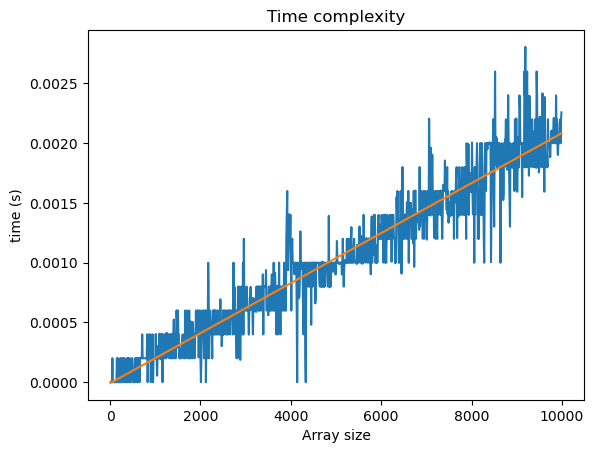

In [11]:
#call the function time_complexity
time_per_size=time_complexity(10000,10,5)


#adjust a lineal function
time_per_size=np.array(time_per_size)
size=np.arange(10,10000,10)
m,b=np.polyfit(size,time_per_size,1)
print("m es: ",m)
print("b es: ",b)
y=m*size+b

#plot time per size and lineal function
import matplotlib.pyplot as plt
size=np.arange(10,10000,10)
plt.plot(size,time_per_size)
plt.plot(size,y)
plt.ylabel('time (s)')
plt.xlabel('Array size')
plt.title('Time complexity')
plt.show()

as we can see in the graph, the time complexity is O(n), this is because the time grows linearly with the size of the array